In [2]:
import numpy as np
import pandas as pd

Importing Data

In [3]:
df =pd.read_csv("./Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.shape

(545, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


checking null values

In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Exploratory Data Analysis

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

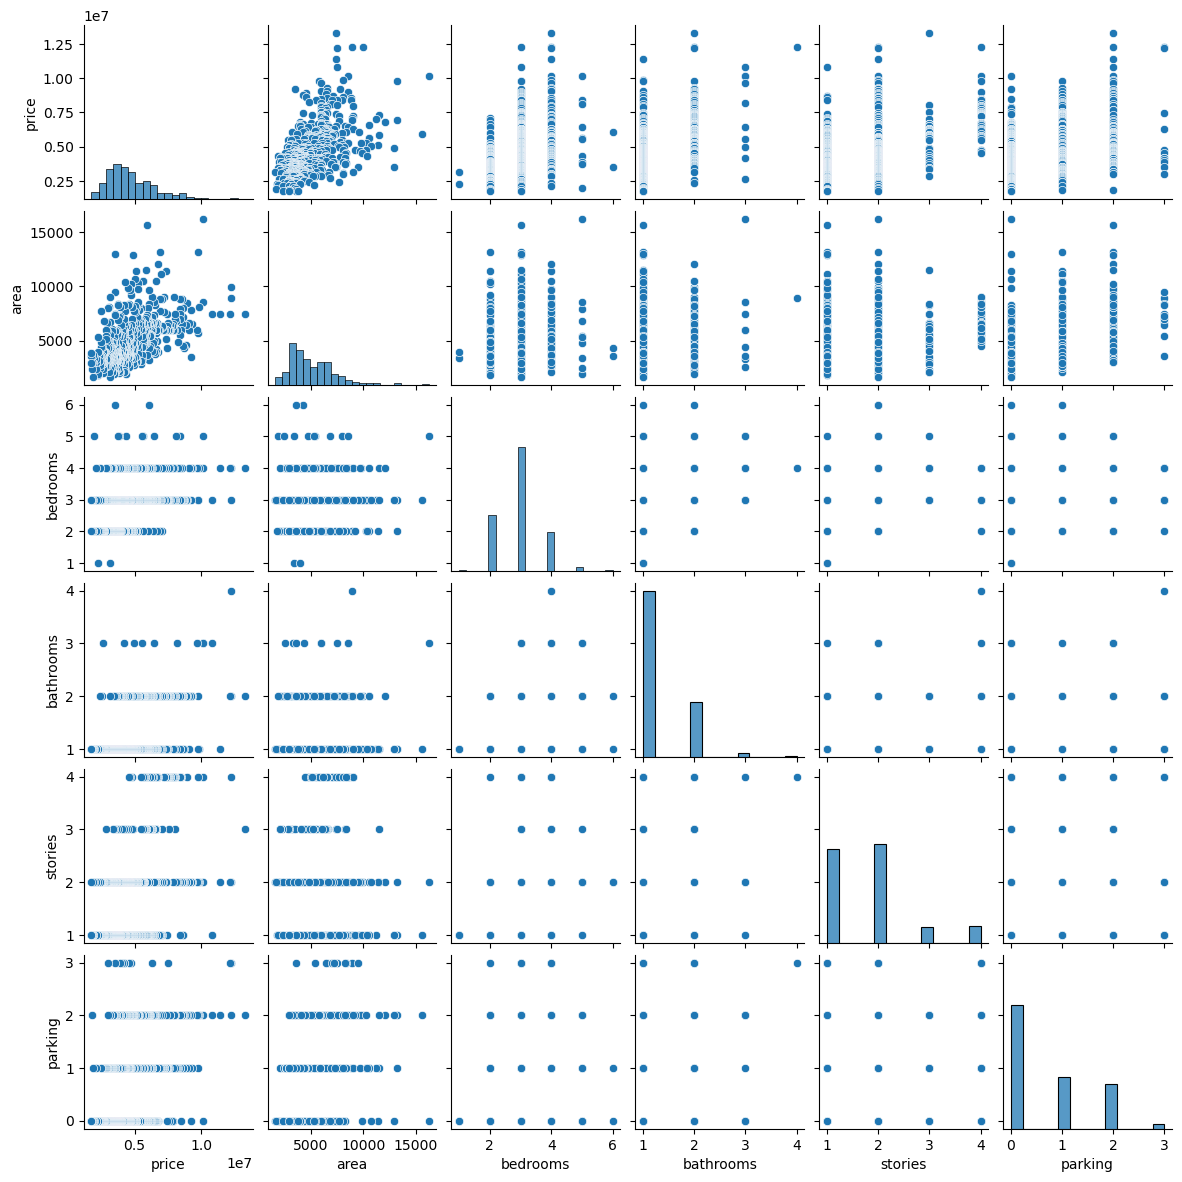

In [8]:
sns.pairplot(df,height=2)
plt.show()

In [9]:
train_data = df.copy()

In [10]:
train_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

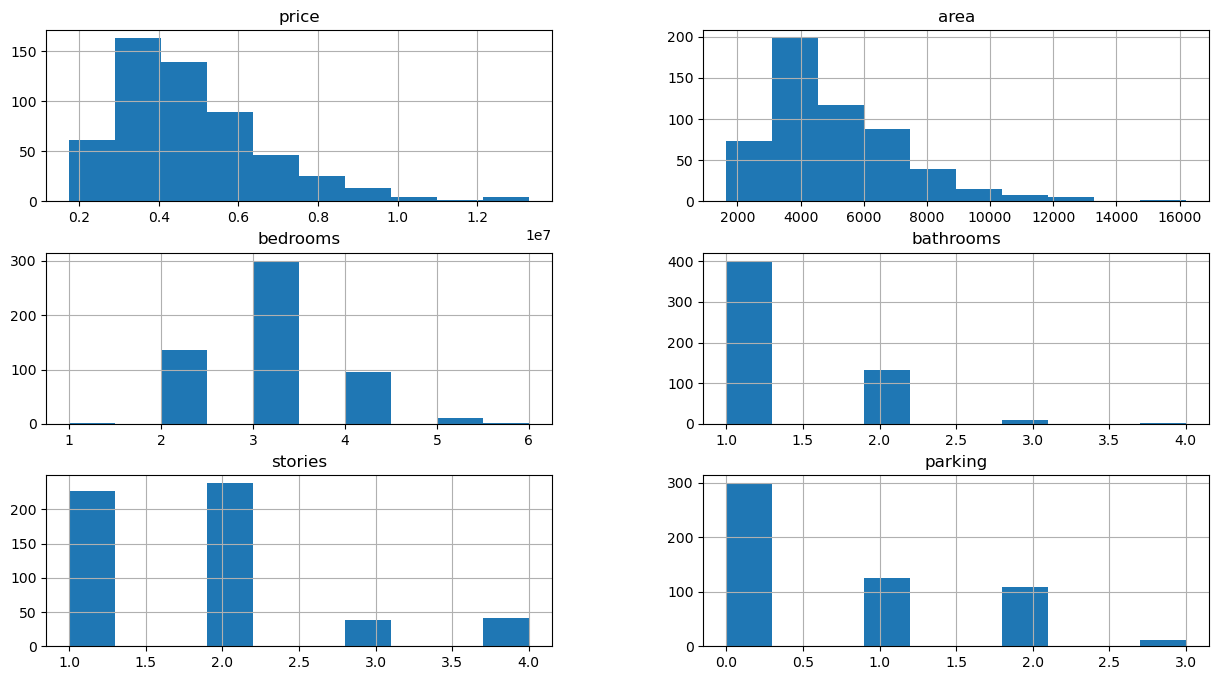

In [11]:
train_data.hist(figsize=(15,8))

/var/folders/yd/6l3qbbqj2qx_y_lxrr45xd480000gn/T/ipykernel_88797/368810788.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True)


<Axes: >

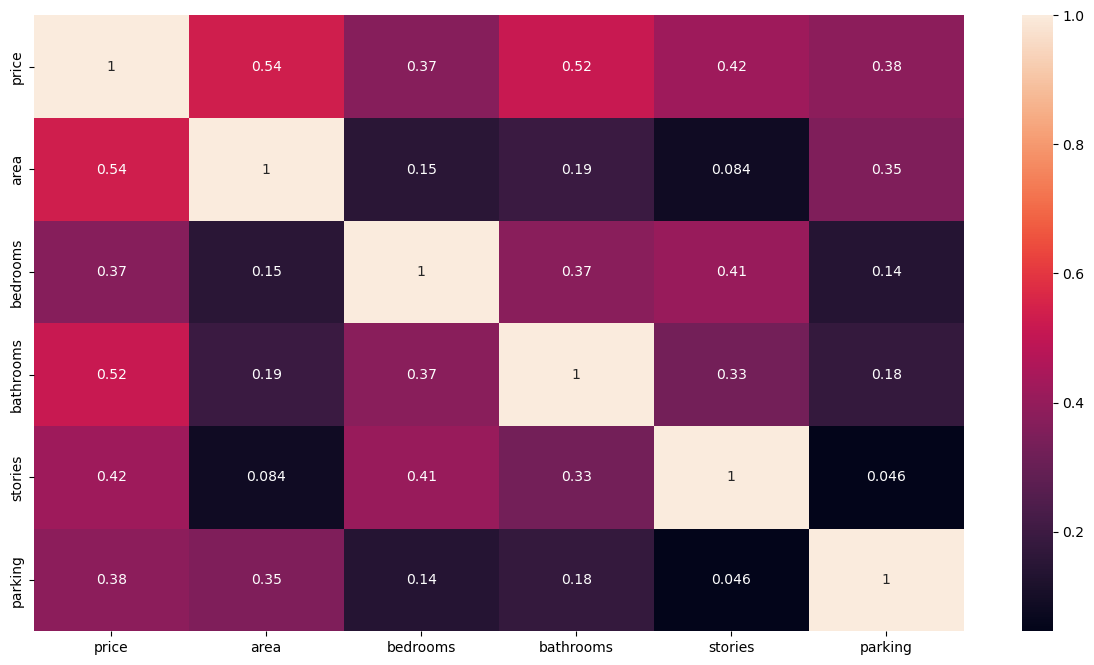

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True)

This corelation matrix shows that all the features are corelated to the target variable price which have significant impact on it

There are attributes like main road, guestroom, basement, hotwaterheating, airconditioning, prefarea of yes or no type So, we wiil convert them yes to be 1 and no to be 0

In [13]:
columns_to_convert =['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

In [14]:
def convet_to_binary(attribute):
    if attribute == 'yes':
        return 1
    elif attribute == 'no':
        return 0
    else:
        return attribute

In [15]:
train_data[columns_to_convert] = train_data[columns_to_convert].applymap(convet_to_binary)

In [16]:
train_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [17]:
train_data.furnishingstatus.value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

Furnished status attribute has three values so we to convert them into numerical we will create each instance as feature and presence of it will be represented as 1

In [18]:
train_data = train_data.join(pd.get_dummies(train_data.furnishingstatus)).drop(['furnishingstatus'],axis=1)

In [19]:
train_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


Training the Model

Train test spllit

In [20]:
x = train_data.drop(['price'],axis =1)
y = train_data['price']

In [21]:
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [22]:
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(436, 14)
(436,)
(109, 14)
(109,)


Normalizing the data

In [26]:
from sklearn.preprocessing import StandardScaler


In [27]:

# Initialize the StandardScaler
scalar = StandardScaler()
scalar2 =StandardScaler()
# Convert pandas Series to numpy arrays
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

# Reshape y_train and y_test
y_train_np = y_train_np.reshape(-1, 1)
y_test_np = y_test_np.reshape(-1, 1)

# Fit and transform x_train, transform y_train, x_test, and y_test
x_train_scaled = scalar.fit_transform(x_train)
y_train_scaled = scalar2.fit_transform(y_train_np)
x_test_scaled = scalar.transform(x_test)
y_test_scaled = scalar2.transform(y_test_np)


Training on different models

In [28]:
model_eval = dict()

Random Forest Regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor


In [30]:
rf_regressor = RandomForestRegressor(n_estimators=400, random_state=42)


In [31]:
rf_regressor.fit(x_train_scaled, y_train_scaled)


/var/folders/yd/6l3qbbqj2qx_y_lxrr45xd480000gn/T/ipykernel_88797/1313950365.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(x_train_scaled, y_train_scaled)


RandomForestRegressor(n_estimators=400, random_state=42)

In [32]:
y_pred_scaled = rf_regressor.predict(x_test_scaled)


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
mse_reg = mean_squared_error(y_test_scaled, y_pred_scaled)
r2_reg = r2_score(y_test_scaled, y_pred_scaled)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse_reg)
print("R-squared:", r2_reg)


Mean Absolute Error: 0.5771940545026014
Mean Squared Error: 0.6274219021261498
R-squared: 0.6172596647524204


In [34]:
model_eval.update({
    'model':['RandomForestRegressor'],
    'MSE' : [mse_reg],
    'R-Squared' : [r2_reg]
})

Decision Trees

In [35]:
from sklearn.tree import DecisionTreeRegressor


# Instantiate the model
model = DecisionTreeRegressor()

# Train the model
model.fit(x_train_scaled, y_train_scaled)

# Make predictions
predictions = model.predict(x_test_scaled)

# Calculate the errors
mse_des = mean_squared_error(y_test_scaled, predictions)
r_squared_des = r2_score(y_test_scaled, predictions)
print("Mean Squared Error:", mse_des)
print("R-squared:", r_squared_des)


Mean Squared Error: 1.0719271286932228
R-squared: 0.3461022842735726


In [36]:
model_eval['model'].append('DecisionTreeRegressor')
model_eval['MSE'].append(mse_des)
model_eval['R-Squared'].append(r_squared_des)


Support Vector Machines(SVM)

In [37]:
from sklearn.svm import SVR


# Instantiate the model
model = SVR(kernel='rbf')

# Train the model
model.fit(x_train_scaled, y_train_scaled)

# Make predictions
predictions = model.predict(x_test_scaled)

# Calculate the errors
mse_svm = mean_squared_error(y_test_scaled, predictions)
r_squared_svm = r2_score(y_test_scaled, predictions)
print("Mean Squared Error:", mse_svm)
print("R-squared:", r_squared_svm)


Mean Squared Error: 0.6518199605372483
R-squared: 0.6023763445750252


/Users/uvaishnav/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
model_eval['model'].append('SVR')
model_eval['MSE'].append(mse_svm)
model_eval['R-Squared'].append(r_squared_svm)


Gradient Boostinvg Regressor

In [39]:
from xgboost import XGBRegressor

# Instantiate the model
model = XGBRegressor()

# Train the model
model.fit(x_train_scaled, y_train_scaled)

# Make predictions
predictions = model.predict(x_test_scaled)

# Calculate the errors
mse_xg = mean_squared_error(y_test_scaled, predictions)
r_squared_xg = r2_score(y_test_scaled, predictions)
print("Mean Squared Error:", mse_xg)
print("R-squared:", r_squared_xg)


Mean Squared Error: 0.669483248541753
R-squared: 0.5916013736192623


In [40]:
model_eval['model'].append('XGBRegressor')
model_eval['MSE'].append(mse_xg)
model_eval['R-Squared'].append(r_squared_xg)


Deep Neural Network

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(14,)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
history = model.fit(x_train_scaled, y_train_scaled, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mse_dnn = model.evaluate(x_test_scaled, y_test_scaled)
print("Mean Squared Error on test set:", mse_dnn)



Epoch 1/50


2024-02-17 22:36:31.781841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 5s 80ms/step - loss: 1.7763 - mean_squared_error: 1.7763 - val_loss: 0.7435 - val_mean_squared_error: 0.7435
Epoch 2/50
11/11 [==============================] - 0s 14ms/step - loss: 0.5060 - mean_squared_error: 0.5060 - val_loss: 0.4431 - val_mean_squared_error: 0.4431
Epoch 3/50
11/11 [==============================] - 0s 14ms/step - loss: 0.3522 - mean_squared_error: 0.3522 - val_loss: 0.4200 - val_mean_squared_error: 0.4200
Epoch 4/50
11/11 [==============================] - 0s 14ms/step - loss: 0.3315 - mean_squared_error: 0.3315 - val_loss: 0.4120 - val_mean_squared_error: 0.4120
Epoch 5/50
11/11 [==============================] - 0s 13ms/step - loss: 0.3067 - mean_squared_error: 0.3067 - val_loss: 0.4084 - val_mean_squared_error: 0.4084
Epoch 6/50
11/11 [==============================] - 0s 13ms/step - loss: 0.3063 - mean_squared_error: 0.3063 - val_loss: 0.4106 - val_mean_squared_error: 0.4106
Epoch 7/50
11/11 [===========================

In [42]:
model_eval['model'].append('DeepNN')
model_eval['MSE'].append(mse_dnn)
model_eval['R-Squared'].append(np.nan)


In [43]:
eval_df = pd.DataFrame(model_eval)
eval_df

,model,MSE,R-Squared
0,RandomForestRegressor,0.627422,0.617260
1,DecisionTreeRegressor,1.071927,0.346102
2,SVR,0.651820,0.602376
3,XGBRegressor,0.669483,0.591601
4,DeepNN,0.583107,NaN


Evaluaing the Models

/Users/uvaishnav/anaconda3/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/uvaishnav/anaconda3/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


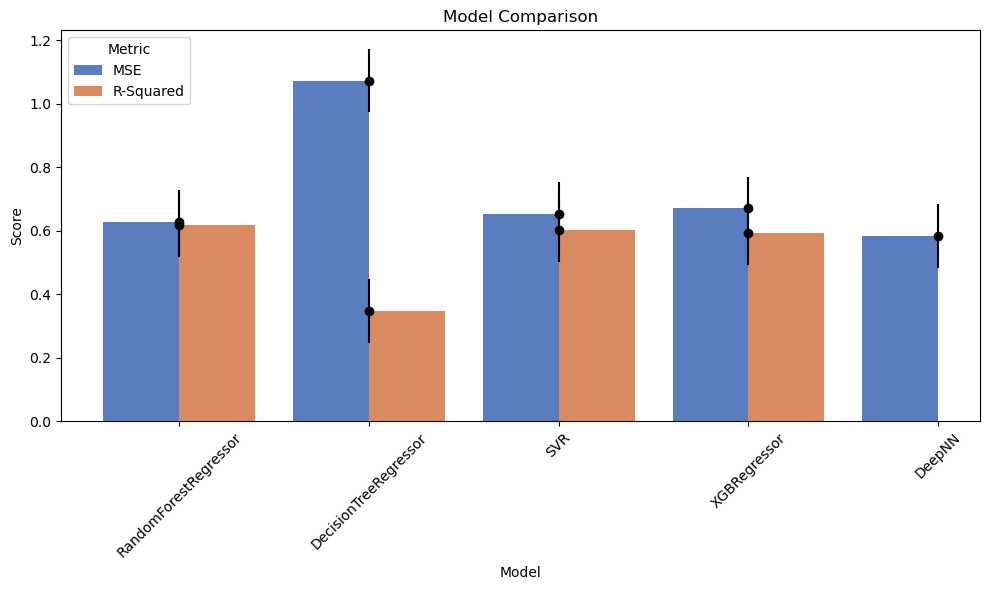

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt


# Melt the DataFrame to long format for visualization
df_melted = eval_df.melt(id_vars='model', var_name='metric', value_name='value')

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='model', y='value', hue='metric', palette='muted')

# Add error bars
for i, metric in enumerate(['MSE', 'R-Squared']):
    for j, model in enumerate(eval_df['model']):
        value = eval_df.loc[j, metric]
        plt.errorbar(j, value, yerr=0.1, fmt='o', color='black')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.legend(title='Metric')

plt.tight_layout()
plt.show()
